In [178]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn
import altair
%matplotlib inline

In [7]:
datos = pd.read_csv("sicoin_programas_acts_2004-2020.csv.gz", index_col=0)

In [14]:
datos.columns

Index(['CodEntidad', 'CodPrograma', 'CodActOb', 'Programa', 'ActOb',
       'Asignado', 'Modificado', 'Vigente', 'PreCompromiso', 'Comprometido',
       'Devengado', 'Pagado', 'SaldoPorComprometer', 'SaldoPorDevengar',
       'SaldoPorPagar', 'PorcentajeE', 'Year'],
      dtype='object')

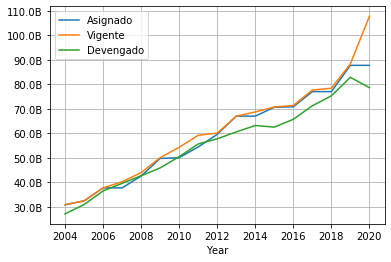

In [32]:
#seaborn.lineplot(
plot = datos.groupby("Year").agg({
    "Asignado": "sum",
    "Vigente": "sum",
    "Devengado": "sum"
}).plot()
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, i: str(x//1e9)+"B"))
plt.grid(True)

In [114]:
import re
import unicodedata

In [128]:
espacios = re.compile('\s+')
puntofinal = re.compile("\.\s*$")
pgnfinal = re.compile("\(PGN\)\s*$")


def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return str(only_ascii.decode()).strip()

In [129]:
datos.CodEntidad.replace(espacios, " ").replace(puntofinal,"").replace(pgnfinal,"").apply(remove_accents)\
.apply(lambda x: x.split(" - ")[1]).value_counts()

MINISTERIO DE COMUNICACIONES, INFRAESTRUCTURA Y VIVIENDA    3687
SECRETARIAS Y OTRAS DEPENDENCIAS DEL EJECUTIVO              3196
MINISTERIO DE EDUCACION                                     1387
MINISTERIO DE SALUD PUBLICA Y ASISTENCIA SOCIAL             1286
OBLIGACIONES DEL ESTADO A CARGO DEL TESORO                  1042
MINISTERIO DE AGRICULTURA, GANADERIA Y ALIMENTACION          930
MINISTERIO DE CULTURA Y DEPORTES                             702
MINISTERIO DE GOBERNACION                                    682
MINISTERIO DE TRABAJO Y PREVISION SOCIAL                     552
MINISTERIO DE FINANZAS PUBLICAS                              454
MINISTERIO DE ECONOMIA                                       448
MINISTERIO DE DESARROLLO SOCIAL                              447
MINISTERIO DE AMBIENTE Y RECURSOS NATURALES                  409
MINISTERIO DE LA DEFENSA NACIONAL                            383
MINISTERIO DE ENERGIA Y MINAS                                359
MINISTERIO DE RELACIONES 

In [130]:
datos["Entidad"] = datos.CodEntidad.replace(espacios, " ").replace(puntofinal,"").replace(pgnfinal,"").apply(remove_accents)\
.apply(lambda x: x.split(" - ")[1])

In [159]:
datosentidad = datos.groupby(["Entidad", "Year"]).agg({
    "Asignado": "sum",
    "Vigente": "sum",
    "Devengado": "sum"
})

In [205]:
datosentidad.reset_index().columns

Index(['Entidad', 'Year', 'Asignado', 'Vigente', 'Devengado'], dtype='object')

In [552]:
altair.Chart.from_dict(
    {
  "$schema": "https://vega.github.io/schema/vega-lite/v4.json",
  "description": "A simple bar chart with embedded data.",
  "data": {
      "values":  datosentidad.reset_index().to_dict(orient = "records")
  },
  "mark": "rect",
  "encoding": {    
    "x": {
      "field": "Year",
      "type": "nominal"
    },
    "y": {
      "field": "Entidad",
      "type": "nominal"
    },
    "color": {
      "aggregate": "sum", "field": "Devengado",
      "type": "quantitative",
      "scale": {
          "type":"log",
        "scheme": "viridis",
      }
    }
  }
}
)

alt.Chart(...)

In [297]:
plotdata = datosentidad.reset_index().sort_values(["Devengado"],ascending=False).assign(Entidad = lambda x: \
                   x.Entidad.apply(lambda y : y.replace("MINISTERIO", "M.")\
                                  .replace("SECRETARIA", "SEC.").replace("OBLIGACIONES", "OB."))).to_dict(orient = "records")


In [467]:
campo = "Devengado"
altair.Chart.from_dict(
{
  "$schema": "https://vega.github.io/schema/vega-lite/v4.json",
  "description": "Chart",
  "data": {
      "values":  plotdata
  },
    "layer":[
        {
          "mark": {"type": "bar", "tooltip": True},
          "encoding": {
            "tooltip": [
              {"field": campo, "type": "quantitative", "title": campo, "format": ".2s"},
              {"field": "Entidad", "type": "nominal", "title": "Entidad"},
            ],
            #"order":  {"field": campo, "type": "quantitative"
            #},
            "y": {
              "field": campo, 
              "type": "quantitative", 
                "axis": {"format": ".2s", "title": campo},
             #   "scale": {"type": "pow", "exponent": 0.5,}
            },
            "x": {"field": "Year", "type": "nominal"},
            "color": {
              "field": "Entidad",
                "type": "nominal",
              "scale": {"scheme": "category20b"}
            }

          }
        }
    ],
  "width": 600
})

alt.LayerChart(...)

In [468]:
campo = "Devengado"
altair.Chart.from_dict(
{
  "$schema": "https://vega.github.io/schema/vega-lite/v4.json",
  "description": "Chart",
  "data": {
      "values":  plotdata
  },
    "layer":[
        {
          "mark": {"type": "bar", "tooltip": True},
          "encoding": {
            "order":  {"field": campo, "type": "quantitative", "sort":"descending"
            },
            "y": {
              "field": campo, 
              "type": "quantitative", 
                "stack": "normalize",
                "axis": {"format": "%", "title": campo}
            },
            "x": {"field": "Year", "type": "nominal"},
            "color": {
              "field": "Entidad",
                "type": "nominal",
              "scale": {"scheme": "category20b"}
            },
            "tooltip": [
              {"field": campo, "type": "quantitative", "title": campo, "format": ".2s"},
              {"field": "Entidad", "type": "nominal", "title": "Entidad"},
            ],

          }
        }
    ],
  "width": 600
})

alt.LayerChart(...)

In [433]:
campo = "Devengado"
altair.Chart.from_dict(
{
  "$schema": "https://vega.github.io/schema/vega-lite/v4.json",
  "description": "Chart",
  "data": {
      "values":  plotdata
  },
          "mark": {"type": "line", "tooltip": True},
          "encoding": {
              "facet": {"field": "Entidad", "type": "ordinal", "columns": 3},
            "y": {
              "field": campo, 
              "type": "quantitative",
                "axis": {"format": ".2s", "title": campo}
            },
            "x": {"field": "Year", "type": "nominal"},
            "tooltip": [
              {"field": campo, "type": "quantitative", "title": campo, "format": ".2s"},
              {"field": "Entidad", "type": "nominal", "title": "Entidad"},
            ],

          },
  "width": 200, "height": 50,
  "resolve": {
      "axis": {"y": "independent"},
      "scale": {"y": "independent"},
  },
    "title": "Presupuestos por entidad por año"

})

alt.Chart(...)

In [427]:
temp = datosentidad.Devengado.unstack(level=0)
temp["total"] = temp.sum(axis=1)

In [428]:
temp = temp.divide(temp.total, axis="rows")

In [429]:
temp = temp.drop(columns="total").stack().rename("Devengado").reset_index().to_dict("records")

In [430]:
temp[0]

{'Year': 2004.0,
 'Entidad': 'CONTRALORIA GENERAL DE CUENTAS',
 'Devengado': 0.004246229279755743}

In [438]:
campo = "Devengado"
altair.Chart.from_dict(
{
  "$schema": "https://vega.github.io/schema/vega-lite/v4.json",
  "description": "Chart",
  "data": {
      "values":  temp
  },
          "mark": {"type": "line", "tooltip": True},
          "encoding": {
              "facet": {"field": "Entidad", "type": "ordinal", "columns": 3},
            "y": {
              "field": campo, 
              "type": "quantitative",
                "axis": {"format": "%", "title": campo}
            },
            "x": {"field": "Year", "type": "nominal"},
            "tooltip": [
              {"field": campo, "type": "quantitative", "title": campo, "format": ".2s"},
              {"field": "Entidad", "type": "nominal", "title": "Entidad"},
            ],

          },
  "width": 250, "height": 50,
  "resolve": {
      "axis": {"y": "independent"},
      "scale": {"y": "independent"},
  },
    "title": "Porcentaje por entidad cada año"

})

alt.Chart(...)

In [548]:
temp = datosentidad.Devengado.unstack(level=0)
temp["total"] = temp.sum(axis=1)

In [549]:
temp = temp.divide(temp.total, axis="rows")

In [550]:
temp = temp.drop(columns="total").stack().rename("Devengado").reset_index()\
[lambda x: x.Entidad.map(lambda y: "GOBERN" in y)].to_dict("records")

In [551]:
campo = "Devengado"
altair.Chart.from_dict(
{
  "$schema": "https://vega.github.io/schema/vega-lite/v4.json",
  "description": "Chart",
  "data": {
      "values":  temp
  },
          "mark": {"type": "line", "tooltip": True},
          "encoding": {
              "facet": {"field": "Entidad", "type": "ordinal", "columns": 3},
            "y": {
              "field": campo, 
              "type": "quantitative",
                "axis": {"format": "%", "title": campo}
            },
            "x": {"field": "Year", "type": "nominal"},
            "tooltip": [
              {"field": campo, "type": "quantitative", "title": campo, "format": ".2s"},
              {"field": "Entidad", "type": "nominal", "title": "Entidad"},
            ],

          },
  "width": 250, "height": 50,
  "resolve": {
      "axis": {"y": "independent"},
      "scale": {"y": "independent"},
  }
})

alt.Chart(...)

In [534]:
plotdata = datos[datos.Entidad.map(lambda x: "OBLIG" in x)].groupby(["Year","ActOb"]).agg({
    "Devengado": "sum", 
    "Vigente": "sum",
    "Asignado": "sum"
})
plotdata = plotdata[["Devengado"]].divide(1e6).round().unstack(0).reset_index().sort_values(("Devengado", 2019),ascending=False).head(20)
plotdata.fillna(0)

ActOb Devengado                \
Year                                               2004.0 2005.0 2006.0   
38                     APORTE A MUNICIPALIDADES       0.0    0.0    0.0   
90            CLASES PASIVAS CIVILES DEL ESTADO       0.0    0.0    0.0   
288                         SISTEMA DE JUSTICIA       0.0    0.0    0.0   
118                                   EDUCACIÓN       0.0    0.0    0.0   
22                        ADMINISTRACIÓN FISCAL       0.0    0.0    0.0   
220                           PROTECCIÓN SOCIAL       0.0    0.0    0.0   
279                       SERVICIOS ELECTORALES       0.0    0.0    0.0   
24                   ADMINISTRACIÓN LEGISLATIVA       0.0    0.0    0.0   
0                        ABASTECIMIENTO DE AGUA       0.0    0.0    0.0   
136             FOMENTO Y PROMOCIÓN DEL DEPORTE       0.0    0.0    0.0   
271                  SERVICIOS DE FISCALIZACIÓN       0.0    0.0    0.0   
123                          EDUCACIÓN PRIMARIA       0.0    0.0    0.0   
171              ORDENACIÓN DE AGUAS RESIDUALES       0.0    0.0    0.0   
155                INCENTIVOS FORESTALES PINPEP       0.0    0.0    0.0   
60                 APOYO AL SISTEMA DE JUSTICIA       0.0    0.0    0.0   
85    ATENCIÓN A DESASTRES Y GESTIÓN DE RIESGOS       0.0    0.0    0.0   
217                       PROTECCIÓN  AMBIENTAL       0.0    0.0    0.0   
103                    DEFENSORÍA PÚBLICA PENAL       0.0    0.0    0.0   
104                      DESARROLLO COMUNITARIO       0.0    0.0    0.0   
290                                  TRANSPORTE       0.0    0.0    0.0   

                                                                          \
Year 2007.0 2008.0 2009.0 2010.0  2011.0  2012.0  2013.0  2014.0  2015.0   
38      0.0    0.0    0.0    0.0     0.0     0.0  6070.0  6146.0  6391.0   
90      0.0    0.0    0.0    0.0  2890.0  3136.0  3429.0  3607.0  3739.0   
288     0.0    0.0    0.0    0.0  1968.0  2298.0  2434.0  2422.0  2739.0   
118     0.0    0.0    0.0    0.0     0.0     0.0  1476.0  1397.0  1752.0   
22      0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0   771.0   
220     0.0    0.0    0.0    0.0     0.0     0.0   603.0   498.0   537.0   
279     0.0    0.0    0.0    0.0   661.0   147.0   157.0   150.0   654.0   
24      0.0    0.0    0.0    0.0     0.0     0.0   549.0   549.0   672.0   
0       0.0    0.0    0.0    0.0   170.0   217.0   115.0   180.0    62.0   
136     0.0    0.0    0.0    0.0     0.0     0.0   398.0   403.0   377.0   
271     0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0   286.0   
123     0.0    0.0    0.0    0.0     0.0     0.0   106.0   167.0    52.0   
171     0.0    0.0    0.0    0.0     0.0     0.0    87.0   121.0    36.0   
155     0.0    0.0    0.0    0.0     0.0     0.0    74.0   124.0   142.0   
60      0.0    0.0    0.0    0.0   255.0   353.0   313.0   296.0   159.0   
85      0.0    0.0    0.0    0.0     0.0     0.0   178.0   178.0   254.0   
217     0.0    0.0    0.0    0.0     0.0     0.0   155.0   107.0   209.0   
103     0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0   121.0   
104     0.0    0.0    0.0    0.0   228.0   132.0   162.0   183.0    57.0   
290     0.0    0.0    0.0    0.0    53.0    10.0     0.0     0.0   147.0   

                                              
Year  2016.0  2017.0  2018.0  2019.0  2020.0  
38    6621.0  6812.0  6789.0  7615.0  6809.0  
90    4174.0  4686.0  5012.0  5138.0  4151.0  
288   3199.0  3998.0  4099.0  3845.0  3476.0  
118   1911.0  1805.0  2151.0  2169.0  1568.0  
22    1120.0  1244.0  1054.0   956.0   852.0  
220    621.0   726.0   724.0   817.0   769.0  
279    157.0   181.0   194.0   670.0   150.0  
24     719.0   615.0   615.0   613.0   532.0  
0      251.0   502.0   605.0   550.0   263.0  
136    425.0   450.0   458.0   451.0   386.0  
271    328.0   335.0   375.0   422.0   428.0  
123    205.0   340.0   421.0   374.0   216.0  
171    138.0   351.0   445.0   358.0   228.0  
155    271.0 

In [535]:
plotdata = datos[datos.Entidad.map(lambda x: "OBLIG" in x)].groupby(["Year","ActOb"]).agg({
    "Devengado": "sum", 
    "Vigente": "sum",
    "Asignado": "sum"
})
plotdata = plotdata[["Devengado"]].divide(1e6).round().unstack(0)#.reset_index().sort_values(("Devengado", 2020),ascending=False)
plotdata.divide(plotdata.sum()/100.0, axis="columns").round(2).fillna(0).sort_values(("Devengado", 2019), ascending= False).head(20)

Devengado                       \
Year                                         2004.0 2005.0 2006.0 2007.0   
ActOb                                                                      
APORTE A MUNICIPALIDADES                        0.0    0.0    0.0    0.0   
CLASES PASIVAS CIVILES DEL ESTADO               0.0    0.0    0.0    0.0   
SISTEMA DE JUSTICIA                             0.0    0.0    0.0    0.0   
EDUCACIÓN                                       0.0    0.0    0.0    0.0   
ADMINISTRACIÓN FISCAL                           0.0    0.0    0.0    0.0   
PROTECCIÓN SOCIAL                               0.0    0.0    0.0    0.0   
SERVICIOS ELECTORALES                           0.0    0.0    0.0    0.0   
ADMINISTRACIÓN LEGISLATIVA                      0.0    0.0    0.0    0.0   
ABASTECIMIENTO DE AGUA                          0.0    0.0    0.0    0.0   
FOMENTO Y PROMOCIÓN DEL DEPORTE                 0.0    0.0    0.0    0.0   
SERVICIOS DE FISCALIZACIÓN                      0.0    0.0    0.0    0.0   
EDUCACIÓN PRIMARIA                              0.0    0.0    0.0    0.0   
ORDENACIÓN DE AGUAS RESIDUALES                  0.0    0.0    0.0    0.0   
INCENTIVOS FORESTALES PINPEP                    0.0    0.0    0.0    0.0   
APOYO AL SISTEMA DE JUSTICIA                    0.0    0.0    0.0    0.0   
ATENCIÓN A DESASTRES Y GESTIÓN DE RIESGOS       0.0    0.0    0.0    0.0   
PROTECCIÓN  AMBIENTAL                           0.0    0.0    0.0    0.0   
DESARROLLO COMUNITARIO                          0.0    0.0    0.0    0.0   
DEFENSORÍA PÚBLICA PENAL                        0.0    0.0    0.0    0.0   
TRANSPORTE                                      0.0    0.0    0.0    0.0   

                                                                              \
Year                                      2008.0 2009.0 2010.0 2011.0 2012.0   
ActOb                                                                          
APORTE A MUNICIPALIDADES                     0.0    0.0    0.0   0.00   0.00   
CLASES PASIVAS CIVILES DEL ESTADO            0.0    0.0    0.0  16.27  16.35   
SISTEMA DE JUSTICIA                          0.0    0.0    0.0  11.08  11.98   
EDUCACIÓN                                    0.0    0.0    0.0   0.00   0.00   
ADMINISTRACIÓN FISCAL                        0.0    0.0    0.0   0.00   0.00   
PROTECCIÓN SOCIAL                            0.0    0.0    0.0   0.00   0.00   
SERVICIOS ELECTORALES                        0.0    0.0    0.0   3.72   0.77   
ADMINISTRACIÓN LEGISLATIVA                   0.0    0.0    0.0   0.00   0.00   
ABASTECIMIENTO DE AGUA                       0.0    0.0    0.0   0.96   1.13   
FOMENTO Y PROMOCIÓN DEL DEPORTE              0.0    0.0    0.0   0.00   0.00   
SERVICIOS DE FISCALIZACIÓN                   0.0    0.0    0.0   0.00   0.00   
EDUCACIÓN PRIMARIA                           0.0    0.0    0.0   0.00   0.00   
ORDENACIÓN DE AGUAS RESIDUALES               0.0    0.0    0.0   0.00   0.00   
INCENTIVOS FORESTALES PINPEP                 0.0    0.0    0.0   0.00   0.00   
APOYO AL SISTEMA DE JUSTICIA                 0.0    0.0    0.0   1.44   1.84   
ATENCIÓN A DESASTRES Y GESTIÓN DE RIESGOS    0.0    0.0    0.0   0.00   0.00   
PROTECCIÓN  AMBIENTAL                        0.0    0.0    0.0   0.00   0.00   
DESARROLLO COMUNITARIO                       0.0    0.0    0.0   1.28   0.69   
DEFENSORÍA PÚBLICA PENAL                     0.0    0.0    0.0   0.00   0.00   
TRANSPORTE                                   0.0    0.0    0.0   0.30   0.05   

                                                                              \
Year                                      2013.0 2014.0 2015.0 2016.0 2017.0   
ActOb                                                                          
APORTE A MUNICIPALIDADES                   30.79  31.30  31.48  28.19  26.88   
CLASES PASIVAS CIVILES DEL ESTADO          17.39  18.37  18.42  17.77  18.49   
SISTEMA DE JUSTICIA                        12.35  12

In [532]:
plotdata = datos[datos.Entidad.map(lambda x: "OBLIG" in x)].groupby(["Year","ActOb"]).agg({
    "Devengado": "sum", 
    "Vigente": "sum",
    "Asignado": "sum"
})
plotdata = plotdata[["Devengado"]].divide(1e6).round().unstack(0).reset_index().sort_values(("Devengado", 2010),ascending=False).head(20)
plotdata.fillna(0)

ActOb Devengado          \
Year                                                       2004.0  2005.0   
6              ACTIVIDADES DE DESARROLLO URBANO Y RURAL    2141.0  2661.0   
13            ACTIVIDADES DE TRABAJO Y PREVISION SOCIAL    2008.0  2147.0   
17                               ACTIVIDADES JUDICIALES    1172.0  1213.0   
7                              ACTIVIDADES DE EDUCACION     566.0   725.0   
3                  ACTIVIDADES DE ADMINISTRACION FISCAL     607.0   675.0   
88                                    CAMINOS VECINALES     293.0   319.0   
260                       REGISTRO NACIONAL DE PERSONAS       0.0     0.0   
18    ACTIVIDADES LEGISLATIVAS -CONGRESO DE LA REPUB...     250.0   260.0   
168                                   OBRAS MUNICIPALES      53.0    44.0   
33                         AGUA Y SANEAMIENTO AMBIENTAL     275.0   284.0   
5                     ACTIVIDADES DE CULTURA Y DEPORTES     217.0   237.0   
96                             CONSTRUCCIONES ESCOLARES     130.0   161.0   
14                            ACTIVIDADES DE TRANSPORTE      54.0   129.0   
36           APORTE A LA CONTRALORIA GENERAL DE CUENTAS       0.0     0.0   
8                         ACTIVIDADES DE MEDIO AMBIENTE     106.0   103.0   
11                     ACTIVIDADES DE SEGURIDAD INTERNA      56.0    66.0   
281                                  SERVICIOS FORENSES       0.0     0.0   
12                   ACTIVIDADES DE SERVICIOS GENERALES      65.0    91.0   
19    ACTIVIDADES LEGISLATIVAS -PROCURADURIA DERECHO...      46.0    64.0   
127   FIDEICOMISO DE TRANSPORTE DE LA CIUDAD DE GUAT...       0.0     0.0   

                                                                          \
Year  2006.0  2007.0  2008.0  2009.0  2010.0 2011.0 2012.0 2013.0 2014.0   
6     3044.0  3052.0  3782.0  3830.0  4237.0    0.0    0.0    0.0    0.0   
13    2554.0  2724.0  2877.0  3144.0  3329.0    0.0    0.0    0.0    0.0   
17    1327.0  1301.0  1841.0  1785.0  1818.0    0.0    0.0    0.0    0.0   
7      805.0   850.0  1003.0  1048.0  1025.0    0.0    0.0    0.0    0.0   
3      843.0   913.0   996.0   921.0   984.0    0.0    0.0    0.0    0.0   
88     570.0   510.0   608.0   699.0   743.0    0.0    0.0    0.0    0.0   
260      0.0    35.0     0.0   300.0   684.0    0.0    0.0    0.0    0.0   
18     270.0   304.0   304.0   359.0   427.0    0.0    0.0    0.0    0.0   
168    114.0   144.0   120.0   255.0   378.0    0.0    0.0    0.0    0.0   
33     311.0   197.0   287.0   320.0   375.0    0.0    0.0    0.0    0.0   
5      269.0   277.0   304.0   312.0   319.0    0.0    0.0    0.0    0.0   
96     147.0   150.0   199.0   230.0   240.0    0.0    0.0    0.0    0.0   
14     160.0   200.0   341.0   354.0   188.0    0.0    0.0    0.0    0.0   
36       0.0     0.0   228.0   167.0   173.0    0.0    0.0    0.0    0.0   
8      123.0   157.0   167.0   166.0   130.0    0.0    0.0    0.0    0.0   
11      62.0   119.0   173.0   150.0   130.0    0.0    0.0    0.0    0.0   
281      0.0     0.0   275.0    95.0   127.0    0.0    0.0    0.0    0.0   
12      93.0    91.0   131.0   116.0   127.0    0.0    0.0    0.0    0.0   
19      65.0    74.0   109.0   101.0   101.0    0.0    0.0    0.0    0.0   
127      0.0     0.0    65.0    90.0   100.0    0.0    0.0    0.0    0.0   

                                                
Year 2015.0 2016.0 2017.0 2018.0 2019.0 2020.0  
6       0.0    0.0    0.0    0.0    0.0    0.0  
13      0.0    0.0    0.0    0.0    0.0    0.0  
17      0.0    0.0    0.0    0.0    0.0    0.0  
7       0.0    0.0    0.0    0.0    0.0    0.0  
3       0.0    0.0    0.0    0.0    0.0    0.0  
88      0.0    0.0    0.0    0.0    0.0    0.0  
260     0.0    0.0    0.0    0.0    0.0    0.0  
18      0.0    0.0    0.0    0.0    0.0    0.0  
168     0.0    0.0    0.0    0.0    0.0    0.0  
33      0.0    0.0    0.0    0.0    0.0    0.0  
5       0.0    0.0    0.0    0.0    0.0    0.0  
96      0.0    0.0    0.0    0.0    0.0    0.

In [533]:
plotdata = datos[datos.Entidad.map(lambda x: "OBLIG" in x)].groupby(["Year","ActOb"]).agg({
    "Devengado": "sum", 
    "Vigente": "sum",
    "Asignado": "sum"
})
plotdata = plotdata[["Devengado"]].divide(1e6).round().unstack(0)#.reset_index().sort_values(("Devengado", 2020),ascending=False)
plotdata.divide(plotdata.sum()/100.0, axis="columns").round(2).fillna(0).sort_values(("Devengado", 2004), ascending= False).head(20)

Devengado                \
Year                                                  2004.0 2005.0 2006.0   
ActOb                                                                        
ACTIVIDADES DE DESARROLLO URBANO Y RURAL               23.24  26.24  26.13   
ACTIVIDADES DE TRABAJO Y PREVISION SOCIAL              21.79  21.17  21.92   
ACTIVIDADES JUDICIALES                                 12.72  11.96  11.39   
ACTIVIDADES DE ADMINISTRACION FISCAL                    6.59   6.66   7.24   
ACTIVIDADES DE EDUCACION                                6.14   7.15   6.91   
AGENDA DE PAZ Y RECONCILIACION                          4.34   0.00   0.00   
CAMINOS VECINALES                                       3.18   3.15   4.89   
AGUA Y SANEAMIENTO AMBIENTAL                            2.98   2.80   2.67   
ACTIVIDADES LEGISLATIVAS -CONGRESO DE LA REPUBL...      2.71   2.56   2.32   
ACTIVIDADES DE CULTURA Y DEPORTES                       2.36   2.34   2.31   
FONDO FIDUCIARIO DE CAPITALIZACION BANCARIA, AJ...      2.11   0.00   0.00   
FONDO PARA LA PROTECCION DEL AHORRO, AJUSTE AL ...      2.11   0.00   0.00   
CONSTRUCCIONES ESCOLARES                                1.41   1.59   1.26   
ACTIVIDADES DE MEDIO AMBIENTE                           1.15   1.02   1.06   
ACTIVIDADES DE SERVICIOS GENERALES                      0.71   0.90   0.80   
ACTIVIDADES DE TURISMO                                  0.68   0.64   0.57   
ACTIVIDADES DE SEGURIDAD INTERNA                        0.61   0.65   0.53   
ACTIVIDADES DE TRANSPORTE                               0.59   1.27   1.37   
OBRAS MUNICIPALES                                       0.58   0.43   0.98   
ACTIVIDADES LEGISLATIVAS -PROCURADURIA DERECHOS...      0.50   0.63   0.56   

                                                                         \
Year                                               2007.0 2008.0 2009.0   
ActOb                                                                     
ACTIVIDADES DE DESARROLLO URBANO Y RURAL            24.07  25.49  25.32   
ACTIVIDADES DE TRABAJO Y PREVISION SOCIAL           21.48  19.39  20.79   
ACTIVIDADES JUDICIALES                              10.26  12.41  11.80   
ACTIVIDADES DE ADMINISTRACION FISCAL                 7.20   6.71   6.09   
ACTIVIDADES DE EDUCACION                             6.70   6.76   6.93   
AGENDA DE PAZ Y RECONCILIACION                       0.00   0.00   0.00   
CAMINOS VECINALES                                    4.02   4.10   4.62   
AGUA Y SANEAMIENTO AMBIENTAL                         1.55   1.93   2.12   
ACTIVIDADES LEGISLATIVAS -CONGRESO DE LA REPUBL...   2.40   2.05   2.37   
ACTIVIDADES DE CULTURA Y DEPORTES                    2.18   2.05   2.06   
FONDO FIDUCIARIO DE CAPITALIZACION BANCARIA, AJ...   0.00   0.00   0.00   
FONDO PARA LA PROTECCION DEL AHORRO, AJUSTE AL ...   0.00   0.00   0.00   
CONSTRUCCIONES ESCOLARES                             1.18   1.34   1.52   
ACTIVIDADES DE MEDIO AMBIENTE                        1.24   1.13   1.10   
ACTIVIDADES DE SERVICIOS GENERALES                   0.72   0.88   0.77   
ACTIVIDADES DE TURISMO                               0.58   0.50   0.50   
ACTIVIDADES DE SEGURIDAD INTERNA                     0.94   1.17   0.99   
ACTIVIDADES DE TRANSPORTE                            1.58   2.30   2.34   
OBRAS MUNICIPALES                                    1.14   0.81   1.69   
ACTIVIDADES LEGISLATIVAS -PROCURADURIA DERECHOS...   0.58   0.73   0.67   

                                                                         \
Year                                               2010.0 2011.0 2012.0   
ActOb                                                                     
ACTIVIDADES DE DESARROLLO URBANO Y RURAL            26.10    0.0    0.0   
ACTIVIDADES DE TRABAJO Y PREVISION SOCIAL           20.51    0.0    0.0   
ACTIVIDADES JUDICIALES                              11.20    0.0    0.0   
ACTIVIDADES DE ADMINISTRACION FISCAL                 6.06    0.0    0.0   
ACTIV

In [477]:
campo = "Devengado"
altair.Chart.from_dict(
{
  "$schema": "https://vega.github.io/schema/vega-lite/v4.json",
  "description": "Chart",
  "data": {
      "values":  plotdata
  },
          "mark": {"type": "line", "tooltip": True},
          "encoding": {
              "facet": {"field": "Programa", "type": "ordinal", "columns": 3},
            "y": {
              "field": campo, 
              "type": "quantitative",
                "axis": {"format": "%", "title": campo}
            },
            "x": {"field": "Year", "type": "nominal"},
            "tooltip": [
              {"field": campo, "type": "quantitative", "title": campo, "format": ".2s"},
              {"field": "Programa", "type": "nominal", "title": "Programa"},
            ],

          },
  "width": 250, "height": 50,
  "resolve": {
      "axis": {"y": "independent"},
      "scale": {"y": "independent"},
  },
    "title": "Porcentaje por entidad cada año"

})

ValidationError:                                                               Devengado  \
Year   Programa                                                           
2004.0 ASIGNACIONES INMOVILIZADA ACGO. GUB. No. 158-2004   0.000000e+00   
       FIDEICOMISOS                                        1.927362e+05   
       PARTIDAS NO ASIGNABLES A PROGRAMAS                  9.214146e+09   
2005.0 FIDEICOMISOS                                        1.409506e+06   
       PARTIDAS NO ASIGNABLES A PROGRAMAS                  9.564352e+09   
       PROGRAMA DE RECONSTRUCCION ORIGINADO POR LA TOR...  5.800000e+08   
2006.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.140408e+10   
       PREVISION REORDENAMIENTO PRESUPUESTARIO ACDO. G...  0.000000e+00   
       PROGRAMA DE RECONSTRUCCION ORIGINADO POR LA TOR...  2.456612e+08   
2007.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.268480e+10   
       PROGRAMA DE RECONSTRUCCION ORIGINADO POR LA TOR...  0.000000e+00   
2008.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.484061e+10   
2009.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.512857e+10   
2010.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.620995e+10   
       PROGRAMA DE RECONSTRUCCION ORIGINADO POR LA TOR...  2.000000e+07   
2011.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.776938e+10   
2012.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.917083e+10   
       RECONSTRUCCION N7                                   5.000000e+06   
2013.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.971830e+10   
2014.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.963995e+10   
2015.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.030462e+10   
2016.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.348830e+10   
2017.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.534439e+10   
2018.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.596534e+10   
2019.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.679770e+10   
2020.0 Atención por Desastres Naturales y Calamidades ...  2.830000e+09   
       PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.256746e+10   

                                                                Vigente  \
Year   Programa                                                           
2004.0 ASIGNACIONES INMOVILIZADA ACGO. GUB. No. 158-2004   1.230487e+09   
       FIDEICOMISOS                                        2.000000e+05   
       PARTIDAS NO ASIGNABLES A PROGRAMAS                  9.775218e+09   
2005.0 FIDEICOMISOS                                        1.615710e+06   
       PARTIDAS NO ASIGNABLES A PROGRAMAS                  9.741492e+09   
       PROGRAMA DE RECONSTRUCCION ORIGINADO POR LA TOR...  6.438433e+08   
2006.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.168603e+10   
       PREVISION REORDENAMIENTO PRESUPUESTARIO ACDO. G...  5.489264e+06   
       PROGRAMA DE RECONSTRUCCION ORIGINADO POR LA TOR...  2.964216e+08   
2007.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.277253e+10   
       PROGRAMA DE RECONSTRUCCION ORIGINADO POR LA TOR...  2.636019e+06   
2008.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.529505e+10   
2009.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.668857e+10   
2010.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.672322e+10   
       PROGRAMA DE RECONSTRUCCION ORIGINADO POR LA TOR...  2.034874e+07   
2011.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.819530e+10   
2012.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.935718e+10   
       RECONSTRUCCION N7                                   1.534310e+08   
2013.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.179577e+10   
2014.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.182967e+10   
2015.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.273252e+10   
2016.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.469452e+10   
2017.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.656933e+10   
2018.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.709169e+10   
2019.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.863957e+10   
2020.0 Atención por Desastres Naturales y Calamidades ...  3.260000e+09   
       PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.982707e+10   

                                                               Asignado  
Year   Programa                                                          
2004.0 ASIGNACIONES INMOVILIZADA ACGO. GUB. No. 158-2004   0.000000e+00  
       FIDEICOMISOS                                        8.821174e+06  
       PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.138759e+10  
2005.0 FIDEICOMISOS                                        0.000000e+00  
       PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.014103e+10  
       PROGRAMA DE RECONSTRUCCION ORIGINADO POR LA TOR...  0.000000e+00  
2006.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.143773e+10  
       PREVISION REORDENAMIENTO PRESUPUESTARIO ACDO. G...  0.000000e+00  
       PROGRAMA DE RECONSTRUCCION ORIGINADO POR LA TOR...  5.450000e+08  
2007.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.143773e+10  
       PROGRAMA DE RECONSTRUCCION ORIGINADO POR LA TOR...  5.450000e+08  
2008.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.459418e+10  
2009.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.698571e+10  
2010.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.698571e+10  
       PROGRAMA DE RECONSTRUCCION ORIGINADO POR LA TOR...  0.000000e+00  
2011.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.808312e+10  
2012.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.925213e+10  
       RECONSTRUCCION N7                                   0.000000e+00  
2013.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.173303e+10  
2014.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.173303e+10  
2015.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.518862e+10  
2016.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.376865e+10  
2017.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.601901e+10  
2018.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.601901e+10  
2019.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.820517e+10  
2020.0 Atención por Desastres Naturales y Calamidades ...  0.000000e+00  
       PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.820517e+10   is not of type 'array'

Failed validating 'type' in schema[0]:
    {'items': {'type': 'number'}, 'type': 'array'}

On instance:
                                                                  Devengado  \
    Year   Programa                                                           
    2004.0 ASIGNACIONES INMOVILIZADA ACGO. GUB. No. 158-2004   0.000000e+00   
           FIDEICOMISOS                                        1.927362e+05   
           PARTIDAS NO ASIGNABLES A PROGRAMAS                  9.214146e+09   
    2005.0 FIDEICOMISOS                                        1.409506e+06   
           PARTIDAS NO ASIGNABLES A PROGRAMAS                  9.564352e+09   
           PROGRAMA DE RECONSTRUCCION ORIGINADO POR LA TOR...  5.800000e+08   
    2006.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.140408e+10   
           PREVISION REORDENAMIENTO PRESUPUESTARIO ACDO. G...  0.000000e+00   
           PROGRAMA DE RECONSTRUCCION ORIGINADO POR LA TOR...  2.456612e+08   
    2007.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.268480e+10   
           PROGRAMA DE RECONSTRUCCION ORIGINADO POR LA TOR...  0.000000e+00   
    2008.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.484061e+10   
    2009.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.512857e+10   
    2010.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.620995e+10   
           PROGRAMA DE RECONSTRUCCION ORIGINADO POR LA TOR...  2.000000e+07   
    2011.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.776938e+10   
    2012.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.917083e+10   
           RECONSTRUCCION N7                                   5.000000e+06   
    2013.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.971830e+10   
    2014.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.963995e+10   
    2015.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.030462e+10   
    2016.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.348830e+10   
    2017.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.534439e+10   
    2018.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.596534e+10   
    2019.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.679770e+10   
    2020.0 Atención por Desastres Naturales y Calamidades ...  2.830000e+09   
           PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.256746e+10   
    
                                                                    Vigente  \
    Year   Programa                                                           
    2004.0 ASIGNACIONES INMOVILIZADA ACGO. GUB. No. 158-2004   1.230487e+09   
           FIDEICOMISOS                                        2.000000e+05   
           PARTIDAS NO ASIGNABLES A PROGRAMAS                  9.775218e+09   
    2005.0 FIDEICOMISOS                                        1.615710e+06   
           PARTIDAS NO ASIGNABLES A PROGRAMAS                  9.741492e+09   
           PROGRAMA DE RECONSTRUCCION ORIGINADO POR LA TOR...  6.438433e+08   
    2006.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.168603e+10   
           PREVISION REORDENAMIENTO PRESUPUESTARIO ACDO. G...  5.489264e+06   
           PROGRAMA DE RECONSTRUCCION ORIGINADO POR LA TOR...  2.964216e+08   
    2007.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.277253e+10   
           PROGRAMA DE RECONSTRUCCION ORIGINADO POR LA TOR...  2.636019e+06   
    2008.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.529505e+10   
    2009.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.668857e+10   
    2010.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.672322e+10   
           PROGRAMA DE RECONSTRUCCION ORIGINADO POR LA TOR...  2.034874e+07   
    2011.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.819530e+10   
    2012.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.935718e+10   
           RECONSTRUCCION N7                                   1.534310e+08   
    2013.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.179577e+10   
    2014.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.182967e+10   
    2015.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.273252e+10   
    2016.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.469452e+10   
    2017.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.656933e+10   
    2018.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.709169e+10   
    2019.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.863957e+10   
    2020.0 Atención por Desastres Naturales y Calamidades ...  3.260000e+09   
           PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.982707e+10   
    
                                                                   Asignado  
    Year   Programa                                                          
    2004.0 ASIGNACIONES INMOVILIZADA ACGO. GUB. No. 158-2004   0.000000e+00  
           FIDEICOMISOS                                        8.821174e+06  
           PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.138759e+10  
    2005.0 FIDEICOMISOS                                        0.000000e+00  
           PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.014103e+10  
           PROGRAMA DE RECONSTRUCCION ORIGINADO POR LA TOR...  0.000000e+00  
    2006.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.143773e+10  
           PREVISION REORDENAMIENTO PRESUPUESTARIO ACDO. G...  0.000000e+00  
           PROGRAMA DE RECONSTRUCCION ORIGINADO POR LA TOR...  5.450000e+08  
    2007.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.143773e+10  
           PROGRAMA DE RECONSTRUCCION ORIGINADO POR LA TOR...  5.450000e+08  
    2008.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.459418e+10  
    2009.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.698571e+10  
    2010.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.698571e+10  
           PROGRAMA DE RECONSTRUCCION ORIGINADO POR LA TOR...  0.000000e+00  
    2011.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.808312e+10  
    2012.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  1.925213e+10  
           RECONSTRUCCION N7                                   0.000000e+00  
    2013.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.173303e+10  
    2014.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.173303e+10  
    2015.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.518862e+10  
    2016.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.376865e+10  
    2017.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.601901e+10  
    2018.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.601901e+10  
    2019.0 PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.820517e+10  
    2020.0 Atención por Desastres Naturales y Calamidades ...  0.000000e+00  
           PARTIDAS NO ASIGNABLES A PROGRAMAS                  2.820517e+10  

In [439]:
datos.groupby(["Programa", "ActOb"]).Devengado.sum().sort_values(ascending=False).head(10) // 1e6

Programa                                               ActOb                                                                  
SERVICIOS DE LA DEUDA PÚBLICA                          INTERES, COMISIONES Y OTROS GASTOS DE LOS SERVICIOS DE LA DEUDA PÚBLICA    62696.0
PARTIDAS NO ASIGNABLES A PROGRAMAS                     APORTE A MUNICIPALIDADES                                                   53252.0
                                                       CLASES PASIVAS CIVILES DEL ESTADO                                          39962.0
EDUCACIÓN ESCOLAR DE PRIMARIA                          SERVICIOS DE EDUCACIÓN DE PRIMARIA MONOLINGÜE RURAL                        33316.0
PARTIDAS NO ASIGNABLES A PROGRAMAS                     SISTEMA DE JUSTICIA                                                        30478.0
SERVICIOS DE LA DEUDA PÚBLICA                          AMORTIZACIÓN DE LA DEUDA PÚBLICA                                           26683.0
SERVICIOS DE LA DEUDA PUBLICA                

In [440]:
datos[datos.Year == 2019]\
.groupby(["Programa", "ActOb"]).Devengado.sum().sort_values(ascending=False).head(10) // 1e6

Programa                                               ActOb                                                                  
SERVICIOS DE LA DEUDA PÚBLICA                          INTERES, COMISIONES Y OTROS GASTOS DE LOS SERVICIOS DE LA DEUDA PÚBLICA    9689.0
PARTIDAS NO ASIGNABLES A PROGRAMAS                     APORTE A MUNICIPALIDADES                                                   7615.0
                                                       CLASES PASIVAS CIVILES DEL ESTADO                                          5137.0
EDUCACIÓN ESCOLAR DE PRIMARIA                          SERVICIOS DE EDUCACIÓN DE PRIMARIA MONOLINGÜE RURAL                        5015.0
PARTIDAS NO ASIGNABLES A PROGRAMAS                     SISTEMA DE JUSTICIA                                                        3844.0
SERVICIOS DE SEGURIDAD A LAS PERSONAS Y SU PATRIMONIO  SERVICIOS DE SEGURIDAD POLICIAL                                            3115.0
SERVICIOS DE LA DEUDA PÚBLICA                      

In [441]:
temp = datos[datos.Year == 2020]\
.groupby(["CodEntidad", "Programa", "ActOb"]).Devengado.sum().sort_values(ascending=False).head(10) // 1e6
print("\n\n".join(["\n".join(x[0]) + "\t\t" + str(x[1]) for x in temp.iteritems()]))

11130019 - SERVICIOS DE LA DEUDA PUBLICA
SERVICIOS DE LA DEUDA PÚBLICA
INTERES, COMISIONES Y OTROS GASTOS DE LOS SERVICIOS DE LA DEUDA PÚBLICA		8027.0

11130018 - OBLIGACIONES DEL ESTADO A CARGO DEL TESORO
PARTIDAS NO ASIGNABLES A PROGRAMAS
APORTE A MUNICIPALIDADES		6809.0

11130020 - MINISTERIO DE DESARROLLO SOCIAL
ATENCIÓN POR DESASTRES NATURALES Y CALAMIDADES PÚBLICAS
INTERVENCIONES REALIZADAS PARA LA ATENCIÓN DE LA EMERGENCIA COVID-19		6143.0

11130008 - MINISTERIO DE EDUCACIÓN
EDUCACIÓN ESCOLAR DE PRIMARIA
SERVICIOS DE EDUCACIÓN DE PRIMARIA MONOLINGÜE RURAL		4293.0

11130018 - OBLIGACIONES DEL ESTADO A CARGO DEL TESORO
PARTIDAS NO ASIGNABLES A PROGRAMAS
CLASES PASIVAS CIVILES DEL ESTADO		4151.0

11130018 - OBLIGACIONES DEL ESTADO A CARGO DEL TESORO
PARTIDAS NO ASIGNABLES A PROGRAMAS
SISTEMA DE JUSTICIA		3476.0

11130005 - MINISTERIO DE GOBERNACIÓN
SERVICIOS DE SEGURIDAD A LAS PERSONAS Y SU PATRIMONIO
SERVICIOS DE SEGURIDAD POLICIAL		2883.0

11130018 - OBLIGACIONES DEL ESTADO A CAR

In [444]:
defensa = datos[datos.CodEntidad.apply(lambda x: "defensa" in x.lower())]

In [447]:
defensa.groupby(["Year", "ActOb"]).Devengado.sum().sort_values(ascending=False).head(30)/1e6

Year    ActOb                                    
2019.0  DEFENSA TERRESTRE                            624.537351
2020.0  DEFENSA TERRESTRE                            572.371968
2013.0  DEFENSA TERRESTRE                            542.038300
2018.0  DEFENSA TERRESTRE                            532.724716
2017.0  DEFENSA TERRESTRE                            513.145670
2014.0  DEFENSA TERRESTRE                            502.082434
2016.0  DEFENSA TERRESTRE                            496.717326
2015.0  DEFENSA TERRESTRE                            476.249696
2011.0  DEFENSA TERRESTRE                            445.324221
2012.0  DEFENSA TERRESTRE                            434.930616
2019.0  SERVICIOS DE APOYO LOGÍSTICO Y FINANCIERO    355.185243
2010.0  DEFENSA TERRESTRE                            327.107948
2016.0  DEFENSA DEL ESPACIO AÉREO                    326.542528
2009.0  DEFENSA TERRESTRE                            311.884077
2019.0  DEFENSA DE AGUAS JURISDICCIONALES            2

In [450]:
defensa[defensa.ActOb.apply(lambda x: "CIUDADANA" in x)][["Programa", "ActOb", "Year", "Devengado"]].sort_values("Year")

,Programa,ActOb,Year,Devengado
46812,INDEPENDENCIA SOBERANIA E INTEGRIDAD DEL TERRI...,CUERPO DE SEGURIDAD CIUDADANA,2009.0,1.037315e+08
41020,INDEPENDENCIA SOBERANIA E INTEGRIDAD DEL TERRI...,CUERPO DE SEGURIDAD CIUDADANA,2010.0,1.094404e+08
29998,COOPERACION INTEGRAL,APOYO DE SEGURIDAD CIUDADANA,2011.0,1.105424e+08
26994,COOPERACIÓN INTERINSTITUCIONAL Y REGIONAL,APOYO DE SEGURIDAD CIUDADANA,2012.0,1.335185e+08
20821,PREVENCION DE HECHOS DELICTIVOS CONTRA EL PATR...,APOYO DE SEGURIDAD CIUDADANA,2013.0,2.104550e+08
365,PREVENCION DE HECHOS DELICTIVOS CONTRA EL PATR...,APOYO DE SEGURIDAD CIUDADANA,2014.0,1.934189e+08
57814,PREVENCIÓN DE HECHOS DELICTIVOS CONTRA EL PATR...,APOYO DE SEGURIDAD CIUDADANA,2015.0,1.916644e+08
38007,PREVENCIÓN DE HECHOS DELICTIVOS CONTRA EL PATR...,APOYO DE SEGURIDAD CIUDADANA,2016.0,2.010350e+08
8293,PREVENCIÓN DE HECHOS DELICTIVOS CONTRA EL PATR...,APOYO DE SEGURIDAD CIUDADANA,2017.0,1.992832e+08
23886,PREVENCIÓN DE HECHOS DELICTIVOS CONTRA EL PATR...,APOYO DE SEGURIDAD CIUDADANA,2018.0,1.753003e+08


In [454]:
datos[datos.Entidad.map(lambda x: "OBLIGACIONES" in x)].groupby("ActOb").Devengado.sum().sort_values(ascending=False).head(20)

ActOb
APORTE A MUNICIPALIDADES                                                5.325291e+10
CLASES PASIVAS CIVILES DEL ESTADO                                       3.996232e+10
SISTEMA DE JUSTICIA                                                     3.047886e+10
ACTIVIDADES DE DESARROLLO URBANO Y RURAL                                2.274750e+10
ACTIVIDADES DE TRABAJO Y PREVISION SOCIAL                               1.878292e+10
EDUCACIÓN                                                               1.422952e+10
ACTIVIDADES JUDICIALES                                                  1.045722e+10
APORTE  A MUNICIPALIDADES                                               1.031479e+10
ACTIVIDADES DE EDUCACION                                                6.023642e+09
ADMINISTRACIÓN FISCAL                                                   5.997041e+09
ACTIVIDADES DE ADMINISTRACION FISCAL                                    5.939279e+09
PROTECCIÓN SOCIAL                                          